In [ ]:
### Install Dependencies
!pip install -q polyfuzz
### Import Packages

from polyfuzz.models import TFIDF
from polyfuzz import PolyFuzz
import pandas
import pandas as pd
from google.colab import files
import ipywidgets as widgets
from google.colab import drive

### Load TFIDF Model

tfidf = TFIDF(n_gram_range=(1,1), min_similarity=0.95, cosine_method='knn')
model_tfidf = PolyFuzz(tfidf)



# uploading origin file , and selecting origin column

In [ ]:
origin_file = files.upload()
origin_df = pd.read_excel(list(origin_file.keys())[0])
origin_column_picker = widgets.Dropdown(options=list(origin_df.columns),description="Select Origin URLs Column:", value=None)
origin_column_picker

Saving origin-URLs.xlsx to origin-URLs (3).xlsx


Dropdown(description='Select Origin URLs Column:', options=('Address', 'Content Type', 'Status Code', 'Status'…

# uploading destination file , and selecting destination column

In [ ]:
destination_file = files.upload()
destination_df = pd.read_excel(list(destination_file.keys())[0])
dest_column_picker = widgets.Dropdown(options=list(destination_df.columns),description="Select Destination URLs Column:",value=None)
dest_column_picker

Saving destination-URLs.xlsx to destination-URLs (3).xlsx


Dropdown(description='Select Destination URLs Column:', options=('Address', 'Content Type', 'Status Code', 'St…

# calculating similarities & saving the results in csv file

In [ ]:
origin_url_column = origin_column_picker.value
origin_df_clean = origin_df.dropna(subset=[origin_url_column])      # dropna removes the nan values automatically, no need to do it the old way
origin_urls = origin_df_clean[origin_url_column].tolist()

dest_url_column = dest_column_picker.value
destination_df_clean = destination_df.dropna(subset=[dest_url_column])   # dropna removes the nan values automatically, no need to do it the old way
destination_urls = destination_df_clean[dest_url_column].tolist()

# if any of it is a numerical column, then we'll convert those numerical vals to string , because model.match() doesn't take numerical values

origin_urls = [str(i) for i in origin_urls]
destination_urls = [str(i) for i in destination_urls]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,From URL,From,To URL,To,Similarity
305,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Distance Sticks | Basix | Fishing Tackle...,https://korda.withcandour.co.uk/products/n-tra...,Basix Distance Stick | Korda,0.969
335,http://www.korda.co.uk/fishingtackle/leads/dis...,Distance Casting Heli Lead | Leads | Fishing T...,https://korda.withcandour.co.uk/products/rig-s...,Distance Casting Heli | Korda,0.965
329,http://www.korda.co.uk/fishingtackle/leads/dis...,Distance Casting Swivel | Leads | Fishing Tack...,https://korda.withcandour.co.uk/products/quick...,Distance Casting Swivel | Korda,0.965
308,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Baiting Needle | Basix | Fishing Tackle ...,https://korda.withcandour.co.uk/products/origi...,Basix Baiting Needle | Korda,0.963
306,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Hair Rigs Wide Gape | Basix | Fishing Ta...,https://korda.withcandour.co.uk/products/n-tra...,Basix Hair Rigs Wide Gape | Korda,0.956
...,...,...,...,...,...
93,http://www.korda.co.uk/fishingtackle/dvds-book...,Underwater 8 | DVD/Books | Fishing Tackle | Korda,https://korda.withcandour.co.uk/products/compa...,Quick Change Swivel Size 8 | Korda,0.781
178,http://www.korda.co.uk/fishingtackle/pva-syste...,Longchuck PVA System | PVA Systems | Fishing T...,https://korda.withcandour.co.uk/products/kable...,Magnetic Hockey Stick | Korda,0.778
76,http://www.korda.co.uk/fishingtackle/goo/goo-p...,Goo Phase Five | Goo | Fishing Tackle | Korda,https://korda.withcandour.co.uk/products/compa...,KORE Lightweight Hoodie | Korda,0.778
137,http://www.korda.co.uk/fishingtackle/rig-bitz/...,4mm Rubber Bead | Rig Bitz | Fishing Tackle | ...,https://korda.withcandour.co.uk/products/dryko...,Solidz Tail Rubber | Korda,0.777


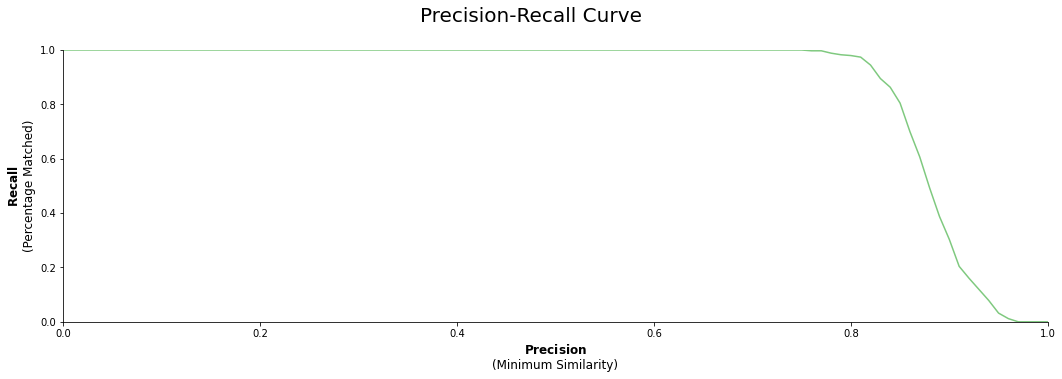

In [ ]:



model_tfidf.match(origin_urls, destination_urls)
results_tfidf = model_tfidf.get_matches()

results_df_tfidf = pd.DataFrame(results_tfidf)
results_df_tfidf.sort_values('Similarity', ascending=False, inplace=True)
results_df_tfidf.insert(0,"From URL",origin_df_clean["Address"])
results_df_tfidf.insert(2,"To URL",destination_df_clean["Address"])

from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/match_results.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  results_df_tfidf.to_csv(f)

result_file = results_df_tfidf.to_excel("match_results.xlsx")
files.download("match_results.xlsx")


model_tfidf.visualize_precision_recall()

results_df_tfidf



# saving the results in google sheets file

In [ ]:
# enter the name of resultant google sheet

sheet_name = str(input("Enter the name of result google sheet & press enter\n"))

Enter the name of result google sheet & press enter
aa


In [ ]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread
import pandas as pd

# Auth
auth.authenticate_user()
#gc = gspread.authorize(GoogleCredentials.get_application_default())
import google.auth

creds, _ = google.auth.default()
gc = gspread.authorize(creds)

#spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1ae_wyjNo2aaLTEg1jTGF27W8YaORB95E1wHf7k-ENyk/edit#gid=0'

#spreadsheet_key = '15dx7_SDmScfowb1ksNpXEqtaJMwbS4pur2Hp5qJiObA'
#workbook = gc.open_by_url(spreadsheet_url)

# checking for existing google sheet , 
# if there is an existing one then just just use that, if there's not then create new
#import os
#path = "/content/drive/My Drive/"
#dir_list = os.listdir(path) # list of files in this location

#if 'test_sheet.gsheet' not in dir_list:
sh = gc.create(sheet_name) # if sheet doesnt exist,then create a new one



# Open our sheet and add some data.
worksheet = gc.open(sheet_name)


worksheet.values_update(
  'A1',
  params={
      'valueInputOption': 'USER_ENTERED'
  },
  body={
      'values': [results_df_tfidf.columns.values.tolist()] + results_df_tfidf.values.tolist()
  }
)

{'spreadsheetId': '1AKiB3wkhLJPNFeLAP_Tj1NOJZ9cml49h57tLcsBue0w',
 'updatedRange': 'Sheet1!A1:E344',
 'updatedRows': 344,
 'updatedColumns': 5,
 'updatedCells': 1720}

# BERT embedding

In [ ]:
#!pip install flair
#!pip install polyfuzz[flair]

In [ ]:
pip install polyfuzz[flair]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,From URL,From,To URL,To,Similarity
306,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Hair Rigs Wide Gape | Basix | Fishing Ta...,https://korda.withcandour.co.uk/products/n-tra...,Basix Hair Rigs Wide Gape | Korda,0.925
307,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Lead Clip Action Pack | Basix | Fishing ...,https://korda.withcandour.co.uk/products/n-tra...,Basix Lead Clip Action Pack | Korda,0.903
308,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Baiting Needle | Basix | Fishing Tackle ...,https://korda.withcandour.co.uk/products/origi...,Basix Baiting Needle | Korda,0.898
6,http://www.korda.co.uk/fishingtackle/compac-lu...,Compac Distance Stick Bag | Compac Luggage | F...,https://korda.withcandour.co.uk/products/bait-...,Compac Distance Stick Bag | Korda,0.895
304,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Lead Clip Leaders | Basix | Fishing Tack...,https://korda.withcandour.co.uk/products/n-tra...,Basix Lead Clip Leaders | Korda,0.895
...,...,...,...,...,...
91,http://www.korda.co.uk/fishingtackle/dvds-book...,Telling Tales 2011 | DVD/Books | Fishing Tackl...,https://korda.withcandour.co.uk/products/compa...,Tackle Box Collection | Korda,0.745
89,http://www.korda.co.uk/fishingtackle/dvds-book...,Telling Tales Yearbook 2010 | DVD/Books | Fish...,https://korda.withcandour.co.uk/products/compa...,Tackle Box Collection | Korda,0.745
266,http://www.korda.co.uk/fishingtackle/clothing/...,4th Dimension Lanyards | Clothing | Fishing Ta...,https://korda.withcandour.co.uk/products/le-wa...,LE Tackle Tee | Korda,0.744
279,http://www.korda.co.uk/fishingtackle/clothing/...,Kore Round Neck Tee – Olive | Clothing | Fishi...,https://korda.withcandour.co.uk/products/maggo...,Compac Tea Set 3 Piece | Korda,0.737


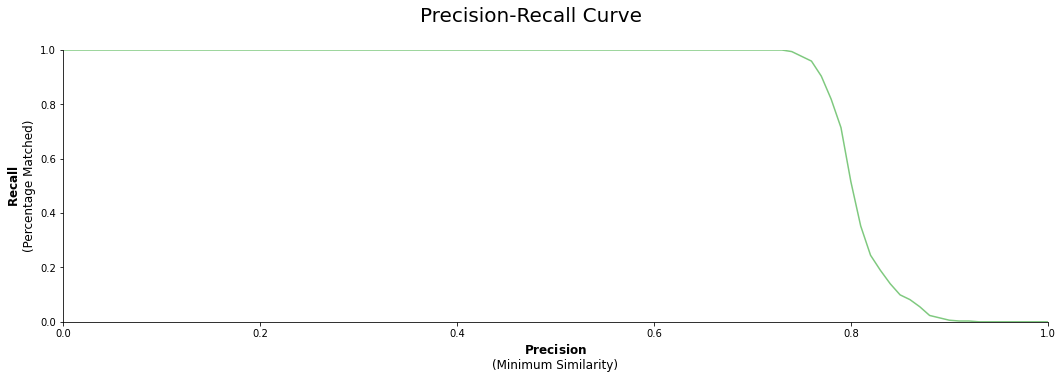

In [ ]:
from polyfuzz import PolyFuzz
from polyfuzz.models import Embeddings
from flair.embeddings import TransformerWordEmbeddings

embeddings = TransformerWordEmbeddings('bert-base-multilingual-cased')
bert = Embeddings(embeddings)

bert_model = PolyFuzz(bert)
bert_model.match(origin_urls, destination_urls)

results_b = bert_model.get_matches()

results_df_b = pd.DataFrame(results_b)
results_df_b.sort_values('Similarity', ascending=False, inplace=True)
results_df_b.insert(0,"From URL",origin_df_clean["Address"])
results_df_b.insert(2,"To URL",destination_df_clean["Address"])

#from google.colab import drive

#drive.mount('/content/drive')
#path = '/content/drive/My Drive/match_results_.csv'

#with open(path, 'w', encoding = 'utf-8-sig') as f:
#  results_df.to_csv(f)


result_file = results_df_b.to_excel("match_results.xlsx")
files.download("match_results.xlsx")

bert_model.visualize_precision_recall()
results_df_b

# Rapidfuzz

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,From URL,From,To URL,To,Similarity
0,http://www.korda.co.uk/fishingtackle/dark-matt...,Dark Matter Braid | Dark Matter | Fishing Tack...,https://korda.withcandour.co.uk/products/anti-...,None,0.0
226,http://www.korda.co.uk/fishingtackle/line-and-...,N-Trap Soft | Line and Hook Links | Fishing Ta...,https://korda.withcandour.co.uk/products/kore-...,None,0.0
234,http://www.korda.co.uk/fishingtackle/kable-lea...,Leadcore Helicopter Leaders | Kable Leadcore |...,https://korda.withcandour.co.uk/products/kore-...,None,0.0
233,http://www.korda.co.uk/fishingtackle/kable-lea...,Kable Leadcore - Weed/Silt | Kable Leadcore | ...,https://korda.withcandour.co.uk/products/kore-...,None,0.0
232,http://www.korda.co.uk/fishingtackle/line-and-...,Arma-Korda Sinking | Line and Hook Links | Fis...,https://korda.withcandour.co.uk/products/kore-...,None,0.0
...,...,...,...,...,...
113,http://www.korda.co.uk/fishingtackle/rig-toolz...,Strippa Tool | Rig Toolz | Fishing Tackle | Korda,https://korda.withcandour.co.uk/products/compa...,None,0.0
112,http://www.korda.co.uk/fishingtackle/rig-toolz...,Bait Drill | Rig Toolz | Fishing Tackle | Korda,https://korda.withcandour.co.uk/products/compa...,None,0.0
111,http://www.korda.co.uk/fishingtackle/rig-toolz...,Krimp Tool | Rig Toolz | Fishing Tackle | Korda,https://korda.withcandour.co.uk/products/compa...,None,0.0
110,http://www.korda.co.uk/fishingtackle/rig-toolz...,Bait/Extenda Stops | Rig Toolz | Fishing Tackl...,https://korda.withcandour.co.uk/products/compa...,None,0.0


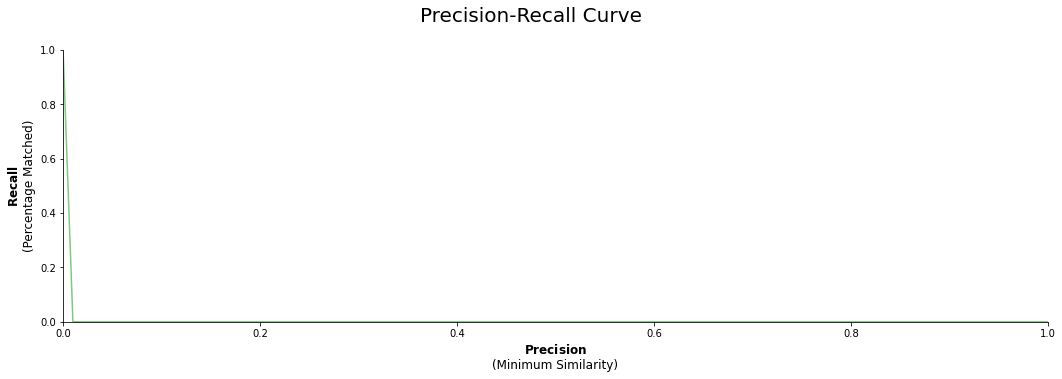

In [ ]:
from polyfuzz.models import RapidFuzz

matcher = RapidFuzz(n_jobs=1, score_cutoff=0.9)
model_rf = PolyFuzz(matcher)
model_rf.match(origin_urls, destination_urls)

results_rf = model_rf.get_matches()

results_df_rf = pd.DataFrame(results_rf)
results_df_rf.sort_values('Similarity', ascending=False, inplace=True)
results_df_rf.insert(0,"From URL",origin_df_clean["Address"])
results_df_rf.insert(2,"To URL",destination_df_clean["Address"])

result_file = results_df_rf.to_excel("match_results.xlsx")
files.download("match_results.xlsx")


model_rf.visualize_precision_recall()

results_df_rf

# EditDistance

In [ ]:
!pip install jellyfish

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 25.1 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73977 sha256=151261aaead4e0f08fea847f6300399e46f294cf91d31cb84301e9b15d862ad0
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,From URL,From,To URL,To,Similarity
307,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Lead Clip Action Pack | Basix | Fishing ...,https://korda.withcandour.co.uk/products/n-tra...,Basix Lead Clip Action Pack | Korda,1.000000
306,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Hair Rigs Wide Gape | Basix | Fishing Ta...,https://korda.withcandour.co.uk/products/n-tra...,Basix Hair Rigs Wide Gape | Korda,0.988743
330,http://www.korda.co.uk/fishingtackle/leads/tou...,Tournament Casting Swivel | Leads | Fishing Ta...,https://korda.withcandour.co.uk/products/quick...,Tournament Casting Swivel | Korda,0.988743
329,http://www.korda.co.uk/fishingtackle/leads/dis...,Distance Casting Swivel | Leads | Fishing Tack...,https://korda.withcandour.co.uk/products/quick...,Distance Casting Swivel | Korda,0.976555
304,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Lead Clip Leaders | Basix | Fishing Tack...,https://korda.withcandour.co.uk/products/n-tra...,Basix Lead Clip Leaders | Korda,0.976555
...,...,...,...,...,...
197,http://www.korda.co.uk/fishingtackle/line-and-...,Ready-Tied IQ D-Rig | Line and Hook Links | Fi...,https://korda.withcandour.co.uk/products/kore-...,Sky Raider & Drop Zone Marker Float Pack Orang...,0.112152
92,http://www.korda.co.uk/fishingtackle/dvds-book...,Ali Hamidi's Carp Fishing Masterclass | DVD/Bo...,https://korda.withcandour.co.uk/products/compa...,Sky Raider & Drop Zone Marker Float Pack Orang...,0.100109
214,http://www.korda.co.uk/fishingtackle/line-and-...,Ready Tied Hinge Rigs | Line and Hook Links | ...,https://korda.withcandour.co.uk/products/kore-...,Kable Leadcore Leader Hybrid Lead Clip Ring Sw...,0.074016
271,http://www.korda.co.uk/fishingtackle/clothing/...,KAMO Pro T Shirt (CHARCOAL) | Clothing | Fishi...,https://korda.withcandour.co.uk/products/longc...,KORE Thermolite Puffer Jacket | Korda,0.045246


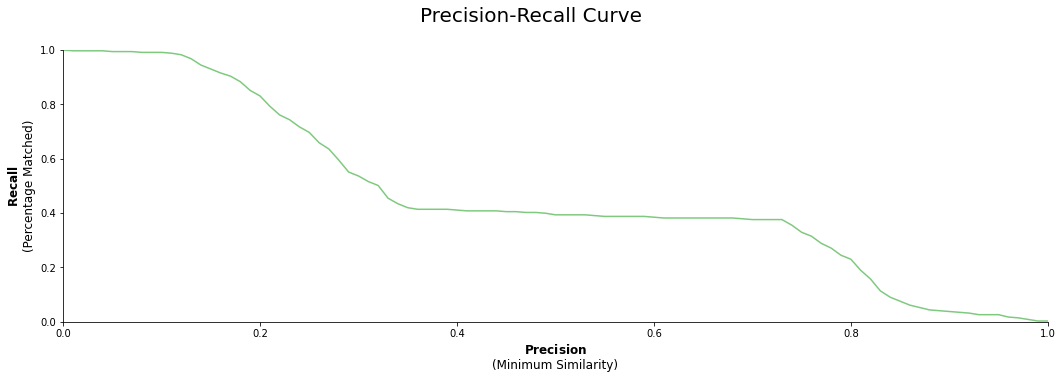

In [ ]:
from polyfuzz import PolyFuzz
from polyfuzz.models import EditDistance
from jellyfish import jaro_winkler_similarity

jellyfish_matcher = EditDistance(n_jobs=1, scorer=jaro_winkler_similarity)


model_ed = PolyFuzz(jellyfish_matcher).match(origin_urls, destination_urls)

results_ed = model_ed.get_matches()

results_df_ed = pd.DataFrame(results_ed)
results_df_ed.sort_values('Similarity', ascending=False, inplace=True)
results_df_ed.insert(0,"From URL",origin_df_clean["Address"])
results_df_ed.insert(2,"To URL",destination_df_clean["Address"])

result_file = results_df_ed.to_excel("match_results.xlsx")
files.download("match_results.xlsx")

model_ed.visualize_precision_recall()
results_df_ed

#SentenceTransformers

In [ ]:
!pip install polyfuzz[sbert]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 776.3 MB 11 kB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6ee3621d83aa5e7c7e3e7b9737b8faa6c3a76f301750ea957d90555b2529fb77
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0
    Uninstalling torch-1.7.0:
      Successfully uninstalled torch-1.7.0


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,From URL,From,To URL,To,Similarity
311,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Carp Cradle | Basix | Fishing Tackle | K...,https://korda.withcandour.co.uk/products/polar...,Basix Carp Cradle | Korda,0.909
308,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Baiting Needle | Basix | Fishing Tackle ...,https://korda.withcandour.co.uk/products/origi...,Basix Baiting Needle | Korda,0.907
23,http://www.korda.co.uk/fishingtackle/compac-lu...,Compac Bait Cool Bag | Compac Luggage | Fishin...,https://korda.withcandour.co.uk/products/basix...,Compac Bait Cool Bag | Korda,0.896
303,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Rig Scissors | Basix | Fishing Tackle | ...,https://korda.withcandour.co.uk/products/no-tr...,Basix Rig Scissors | Korda,0.891
302,http://www.korda.co.uk/fishingtackle/basix/bas...,Basix Coated Hooklink | Basix | Fishing Tackle...,https://korda.withcandour.co.uk/products/naked...,Basix Coated Hooklink | Korda,0.877
...,...,...,...,...,...
223,http://www.korda.co.uk/fishingtackle/line-and-...,Supernatural | Line and Hook Links | Fishing T...,https://korda.withcandour.co.uk/products/kore-...,Hook Safe | Korda,0.529
91,http://www.korda.co.uk/fishingtackle/dvds-book...,Telling Tales 2011 | DVD/Books | Fishing Tackl...,https://korda.withcandour.co.uk/products/compa...,Classics | Korda,0.526
341,http://www.korda.co.uk/fishingtackle/leads/fla...,Flatliner DIstance Inline | Leads | Fishing Ta...,https://korda.withcandour.co.uk/products/runni...,Carp Line | Korda,0.514
165,http://www.korda.co.uk/fishingtackle/lead-syst...,COG System | Lead Systems | Fishing Tackle | K...,https://korda.withcandour.co.uk/products/inlin...,Leadcore Chod System | Korda,0.511


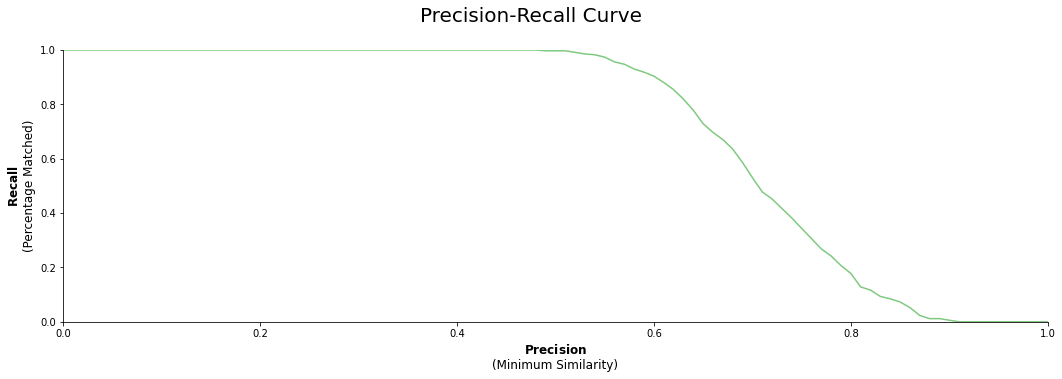

In [ ]:
from polyfuzz import PolyFuzz
from polyfuzz.models import SentenceEmbeddings

distance_model = SentenceEmbeddings("all-MiniLM-L6-v2")
model_st = PolyFuzz(distance_model).match(origin_urls, destination_urls)

results_st = model_st.get_matches()
results_df_st = pd.DataFrame(results_st)
results_df_st.sort_values('Similarity', ascending=False, inplace=True)
results_df_st.insert(0,"From URL",origin_df_clean["Address"])
results_df_st.insert(2,"To URL",destination_df_clean["Address"])

result_file = results_df_st.to_excel("match_results.xlsx")
files.download("match_results.xlsx")


model_st.visualize_precision_recall()
results_df_st

# Gensim

In [ ]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,From URL,From,To URL,To,Similarity
0,http://www.korda.co.uk/fishingtackle/dark-matt...,Dark Matter Braid | Dark Matter | Fishing Tack...,https://korda.withcandour.co.uk/products/anti-...,Zig Rigs | Korda,1.000
236,http://www.korda.co.uk/fishingtackle/kable-lea...,Ready-Tied Leadcore Leaders | Kable Leadcore |...,https://korda.withcandour.co.uk/products/krank...,Zig Rigs | Korda,1.000
242,http://www.korda.co.uk/fishingtackle/clothing/...,Brockman Snap Back Cap | Clothing | Fishing Ta...,https://korda.withcandour.co.uk/products/kruis...,Zig Rigs | Korda,1.000
241,http://www.korda.co.uk/fishingtackle/clothing/...,Chino Shorts | Clothing | Fishing Tackle | Korda,https://korda.withcandour.co.uk/products/krimp...,Zig Rigs | Korda,1.000
240,http://www.korda.co.uk/fishingtackle/clothing/...,Zip Pro Hoodie | Clothing | Fishing Tackle | K...,https://korda.withcandour.co.uk/products/krimps,Zig Rigs | Korda,1.000
...,...,...,...,...,...
270,http://www.korda.co.uk/fishingtackle/clothing/...,Scaly Tee - Burgundy and Black | Clothing | Fi...,https://korda.withcandour.co.uk/products/link-...,Sky Raider & Drop Zone Marker Float Pack Orang...,0.973
287,http://www.korda.co.uk/fishingtackle/clothing/...,Zip Up Hoodie – Black and Olive | Clothing | F...,https://korda.withcandour.co.uk/products/micro...,Sky Raider & Drop Zone Marker Float Pack Orang...,0.973
327,http://www.korda.co.uk/fishingtackle/carp-safe...,Carp Care All-in-One liquid | Carp Safety | Fi...,https://korda.withcandour.co.uk/products/quick...,Zig Rigs | Korda,0.971
262,http://www.korda.co.uk/fishingtackle/clothing/...,Fleece gilet | Clothing | Fishing Tackle | Korda,https://korda.withcandour.co.uk/products/le-lo...,Zig Rigs | Korda,0.965


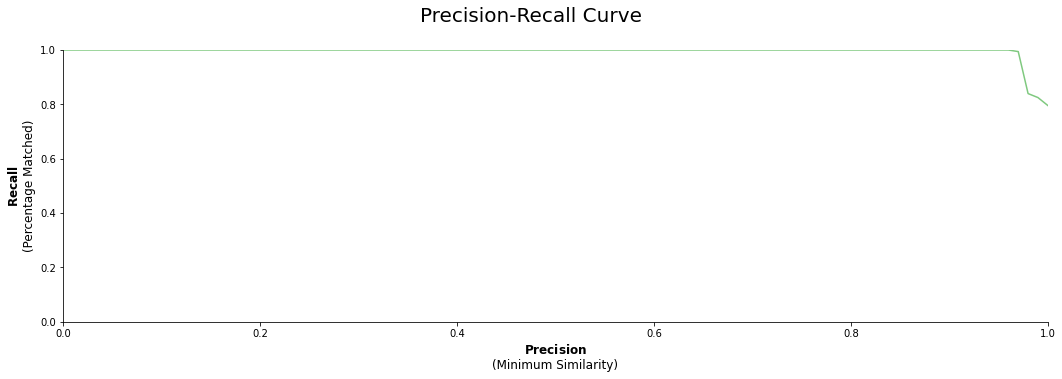

In [ ]:
from polyfuzz import PolyFuzz
from polyfuzz.models import GensimEmbeddings

distance_model = GensimEmbeddings("glove-twitter-25")

model_g = PolyFuzz(distance_model).match(origin_urls, destination_urls)

results_g = model_g.get_matches()
results_df_g = pd.DataFrame(results_g)
results_df_g.sort_values('Similarity', ascending=False, inplace=True)
results_df_g.insert(0,"From URL",origin_df_clean["Address"])
results_df_g.insert(2,"To URL",destination_df_clean["Address"])

result_file = results_df_g.to_excel("match_results.xlsx")
files.download("match_results.xlsx")

model_g.visualize_precision_recall()
results_df_g

# what are these embeddings


In [ ]:
!pip install polyfuzz[flair]
!pip install f
from polyfuzz.models import Embeddings, TFIDF, RapidFuzz
from flair.embeddings import WordEmbeddings

fasttext_embeddings = WordEmbeddings('en-crawl')
fasttext= Embeddings(fasttext_embeddings, min_similarity=0, model_id="FastText")

tfidf = TFIDF(min_similarity=0, model_id="TF-IDF")
rapidfuzz = RapidFuzz(n_jobs=-1, score_cutoff=0, model_id="RapidFuzz")

matchers2 = [tfidf, fasttext, rapidfuzz]

model3 = PolyFuzz(matchers2)
model3.match(origin_urls, destination_urls)
model3.visualize_precision_recall(kde=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.7.0-cp37-cp37m-manylinux1_x86_64.whl (776.7 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-09-23 08:13:39,287 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp_kcftwuc



 20%|██        | 241874944/1200000128 [00:11<00:42, 22494514.89B/s]

KeyboardInterrupt: ignored